# Car Price Prediction

In [46]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


In [47]:
df = pd.read_csv('car_price.csv')

In [4]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

There are 301 rows and 9 columns

In [43]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# Checking the datatypes of the columns

In [7]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

# Checking null values

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

There are no null values present in our data set. 

# Heatmap for the representstion of null values

<AxesSubplot:>

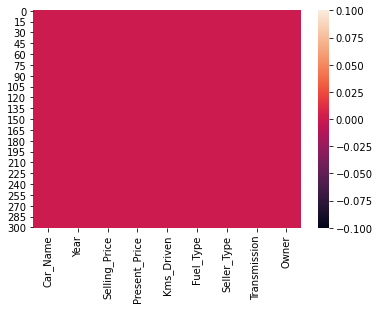

In [9]:
sns.heatmap(df.isnull())

The graph also shows the absence of null values

# DataFrame Description

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.

The problem is of regression type 

# Correlation:

In [40]:
cor=df.corr()

<AxesSubplot:>

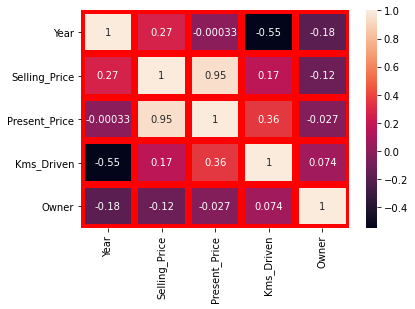

In [41]:
sns.heatmap(cor,annot=True,linewidths=6,linecolor='r')

'Selling_Price' and 'Kms_Driven' are highly correlated with each other.

# Summary Sattistics

In [44]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,7.607692,0.911358,1.432908,10.118687,0.043189
std,0.001437,1.271646,1.221652,1.013535,0.247915
min,7.602401,-2.302585,-1.139434,6.214608,0.000000
25%,7.606885,-0.105361,0.182322,9.615805,0.000000
50%,7.607878,1.280934,1.856298,10.373491,0.000000
75%,7.608871,1.791759,2.292535,10.794809,0.000000
max,7.609862,3.555348,4.528289,13.122363,3.000000


High std deviation indicates that the range is high and data is spread very widely.

There is a high difference between meanand median in 'Year','Kms_Driven' which indicate the presence of right skewed data.The difference between 75th percentile and maximum value is high in 'Owner' column which indicate the presence of outliers.

# Outliers

Year                AxesSubplot(0.125,0.536818;0.065678x0.343182)
Selling_Price    AxesSubplot(0.203814,0.536818;0.065678x0.343182)
Present_Price    AxesSubplot(0.282627,0.536818;0.065678x0.343182)
Kms_Driven       AxesSubplot(0.361441,0.536818;0.065678x0.343182)
Owner            AxesSubplot(0.440254,0.536818;0.065678x0.343182)
dtype: object

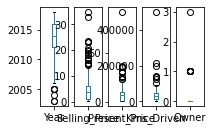

In [10]:
df.plot(kind='box',subplots=True,layout=(2,10))

<AxesSubplot:>

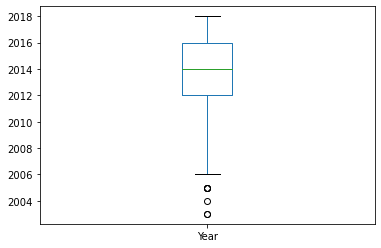

In [11]:
df['Year'].plot.box()

In [12]:
Outiers are present in this column.

SyntaxError: invalid syntax (<ipython-input-12-ad23e7a78fc7>, line 1)

<AxesSubplot:>

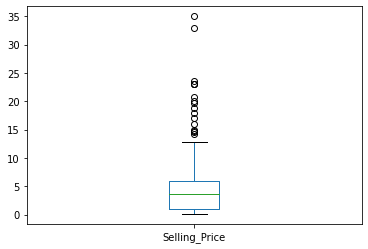

In [13]:
df['Selling_Price'].plot.box()

Outiers are present in this column.

<AxesSubplot:>

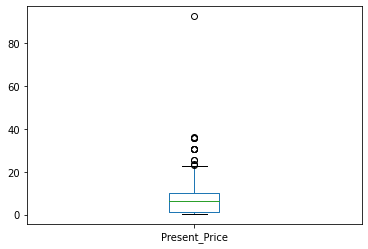

In [14]:
df['Present_Price'].plot.box()

Outiers are present in this column.

<AxesSubplot:>

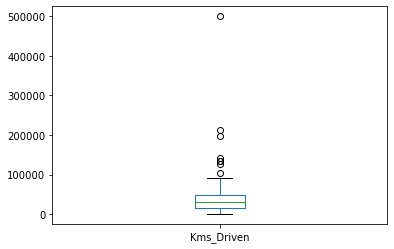

In [15]:
df['Kms_Driven'].plot.box()

Outiers are present in this column.

<AxesSubplot:>

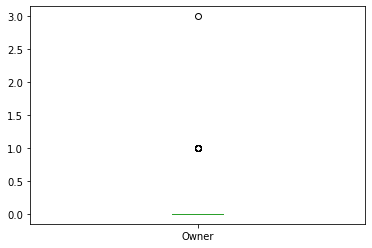

In [16]:
df['Owner'].plot.box()

Outiers are present in this column.

# Skewness

In [17]:
df.skew()

Year            -1.246189
Selling_Price    2.493422
Present_Price    4.083150
Kms_Driven       6.436013
Owner            7.616850
dtype: float64

# Graphical Representation of Skewness

<AxesSubplot:ylabel='Frequency'>

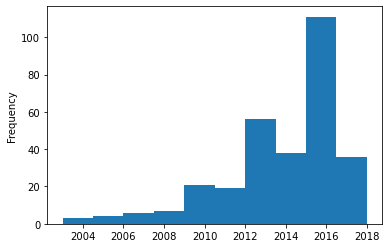

In [18]:
df['Year'].plot.hist()

Skewness is higher than our threshold value of +/-0.65

<AxesSubplot:ylabel='Frequency'>

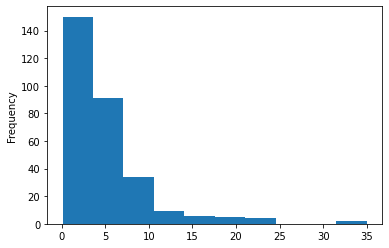

In [19]:
df['Selling_Price'].plot.hist()

Skewness is higher than our threshold value of +/-0.65

<AxesSubplot:ylabel='Frequency'>

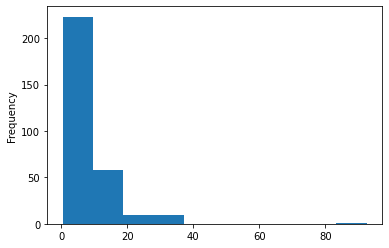

In [20]:
df['Present_Price'].plot.hist()

Skewness is higher than our threshold value of +/-0.65

<AxesSubplot:ylabel='Frequency'>

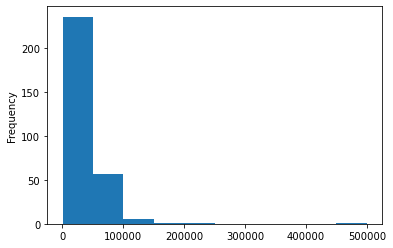

In [21]:
df['Kms_Driven'].plot.hist()

Skewness is higher than our threshold value of +/-0.65

<AxesSubplot:ylabel='Frequency'>

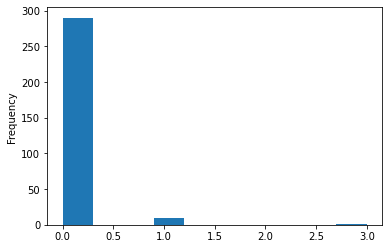

In [22]:
df['Owner'].plot.hist()

Skewness is higher than our threshold value of +/-0.65

# Removal of skewness

In [23]:
from scipy.stats import boxcox
#0--->log transform
#.5--->square root transform
df['Year']=boxcox(df['Year'],0)

<AxesSubplot:ylabel='Frequency'>

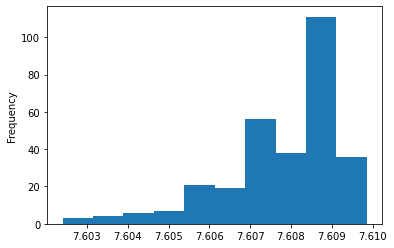

In [24]:
df['Year'].plot.hist()

In [25]:
df['Selling_Price']=boxcox(df['Selling_Price'],0)

<AxesSubplot:ylabel='Frequency'>

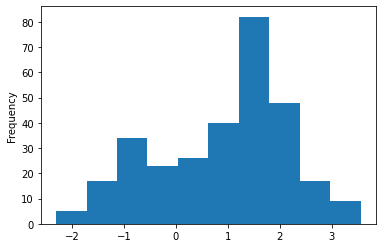

In [26]:
df['Selling_Price'].plot.hist()

In [27]:
df['Present_Price']=boxcox(df['Present_Price'],0)

<AxesSubplot:ylabel='Frequency'>

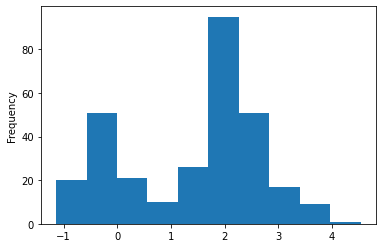

In [28]:
df['Present_Price'].plot.hist()

In [29]:
df['Kms_Driven']=boxcox(df['Kms_Driven'],0)

<AxesSubplot:ylabel='Frequency'>

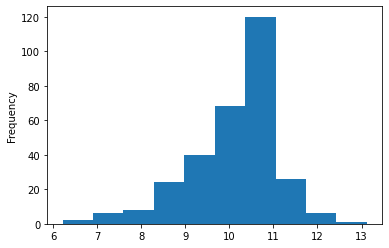

In [30]:
df['Kms_Driven'].plot.hist()

# Normal Distribution Curve:

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

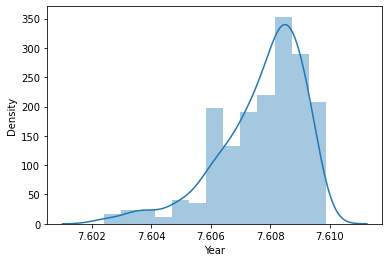

In [33]:
sns.distplot(df['Year'])

Data is not normally distributed as we can see the building blocks lying outside the curve.

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

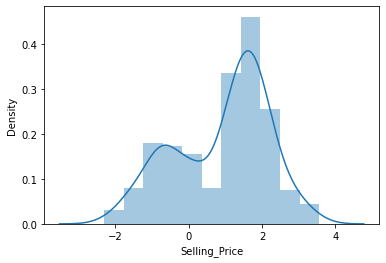

In [34]:
sns.distplot(df['Selling_Price'])

Data is not normally distributed as we can see the building blocks lying outside the curve.

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Present_Price', ylabel='Density'>

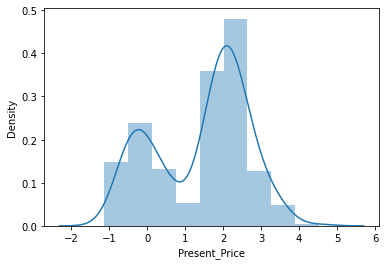

In [35]:
sns.distplot(df['Present_Price'])

Data is not normally distributed as we can see the building blocks lying outside the curve.

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kms_Driven', ylabel='Density'>

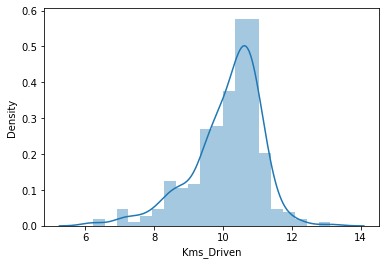

In [36]:
sns.distplot(df['Kms_Driven'])

Data is not normally distributed as we can see the building blocks lying outside the curve.

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Owner', ylabel='Density'>

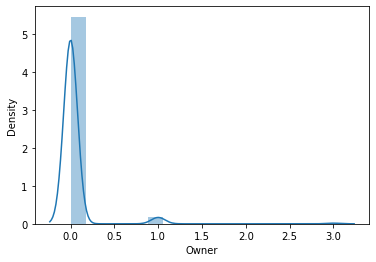

In [37]:
sns.distplot(df['Owner'])

Data is not normally distributed as we can see the building blocks lying outside the curve.

# Data visualization

<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

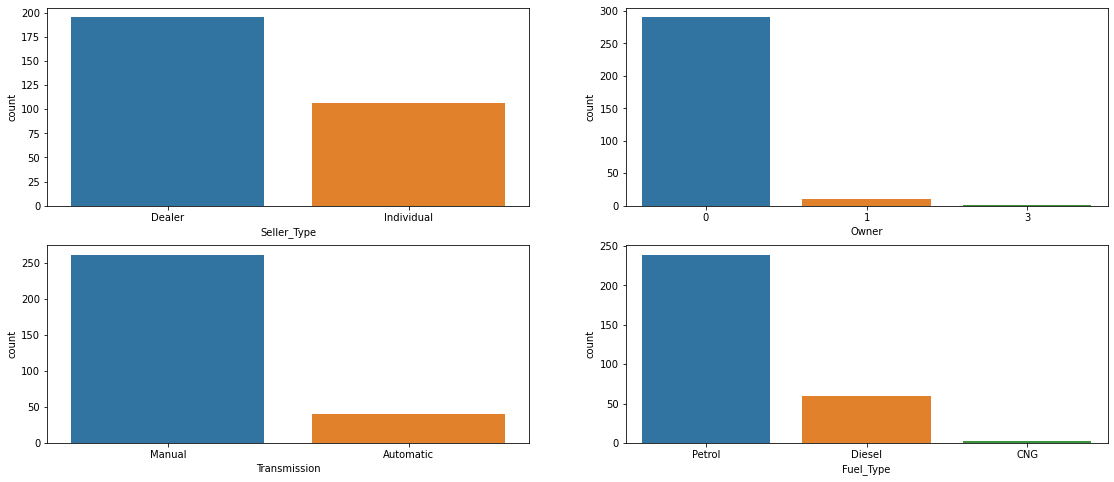

In [13]:
f, axes = plt.subplots(2,2, figsize=(19,8))
sns.countplot(x='Transmission',data=df, ax=axes[1,0])
sns.countplot(x='Fuel_Type',data=df,ax=axes[1,1])
sns.countplot(x='Owner',data=df,ax=axes[0,1])
sns.countplot(x='Seller_Type',data=df,ax=axes[0,0])

from the above graphs we can observe the following:
1)The number of dealer cars is higher than the individual cars
2)The number of manual cars is higher than that ofautomatic cars
3)The number of the third party owners is comparitvely low
4)The number of cars with CNG type of fues is very low compared to that with petrol and diesel.

While making prediction with these types of cars,the prediction is more likely to vary.

# Creating Total Price Difference feature which tells us the total difference between Showroom Price and Selling Price

# Categorical Data

In [16]:
categorical_col=[col for col in df.columns if df[col].dtype=='O']
categorical_col

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

# Continuous Data

In [17]:
continuous_col=[col for col in df.columns if df[col].dtype!='O']
continuous_col

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Price_Diff']

In [18]:
categorical=df[categorical_col]

In [19]:
categorical.head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [20]:
categorical['Car_Name'].value_counts()

city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
ignis                  1
land cruiser           1
Bajaj Pulsar RS200     1
alto 800               1
Hero  CBZ Xtreme       1
Name: Car_Name, Length: 98, dtype: int64

Creating Total Price Difference feature which tells us the total difference between Showroom Price and Selling Price¶

In [27]:
df['Price_Diff']=df['Present_Price']-df['Selling_Price']

<AxesSubplot:xlabel='Seller_Type', ylabel='Price_Diff'>

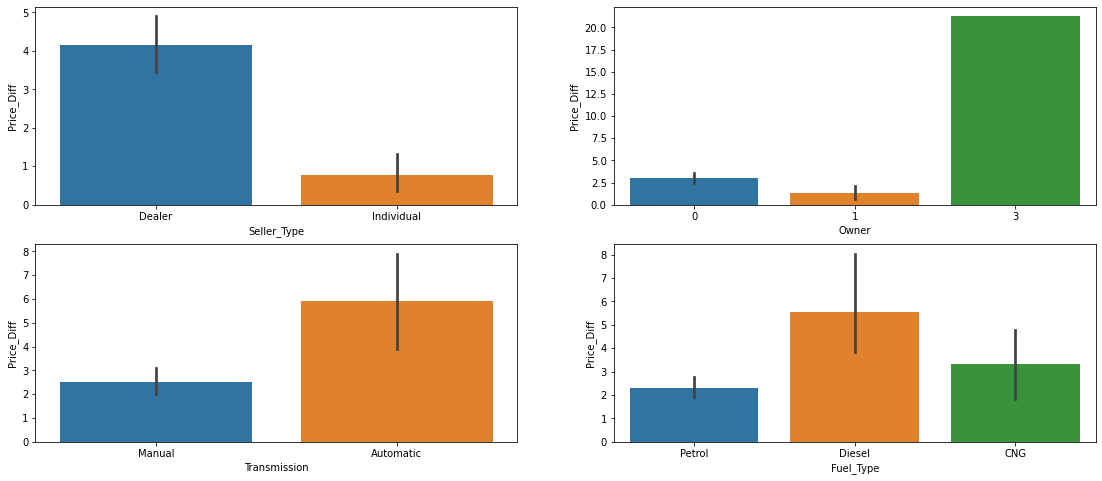

In [28]:
f, axes = plt.subplots(2,2, figsize=(19,8))
sns.barplot(x='Transmission',y='Price_Diff',data=df,ax=axes[1,0])
sns.barplot(x='Fuel_Type',y='Price_Diff',data=df,ax=axes[1,1])
sns.barplot(x='Owner',y='Price_Diff',data=df,ax=axes[0,1])
sns.barplot(x='Seller_Type',y='Price_Diff',data=df,ax=axes[0,0])

From the above graphs we can observe that the catergorical data has some sort of pattern regarding car's present price and selling price.

In [29]:
df['Year']=2019-df['Year']

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

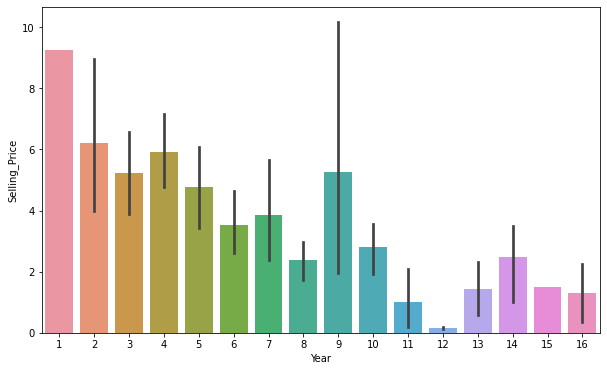

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x='Year',y='Selling_Price',data=df)

Car usage in years andits selling price has a negative correlation

so we can say that as many years car gets used the value decreases.

Present price and selling price are positively correlated

From the graph we can also see that the selling price is not decreasing gradually except in one case.

In [34]:
df[df['Kms_Driven']==78000]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_Diff
62,fortuner,5,18.75,35.96,78000,Diesel,Dealer,Automatic,0,17.21
86,land cruiser,9,35.00,92.60,78000,Diesel,Dealer,Manual,0,57.60


In [35]:
df[df['Kms_Driven']==500000]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_Diff
196,Activa 3g,11,0.17,0.52,500000,Petrol,Individual,Automatic,0,0.35


In [36]:
df.drop([86,196],axis=0,inplace=True)

In [37]:
fuel_dummies =pd.get_dummies(df[['Fuel_Type','Transmission','Seller_Type']], drop_first=True)

In [38]:
df  = pd.concat([df,fuel_dummies],axis = 1)

In [40]:
df.drop(['Car_Name','Fuel_Type','Transmission','Seller_Type','Price_Diff'],axis=1,inplace=True)

In [41]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,5,3.35,5.59,27000,0,0,1,1,0
1,6,4.75,9.54,43000,0,1,0,1,0
2,2,7.25,9.85,6900,0,0,1,1,0
3,8,2.85,4.15,5200,0,0,1,1,0
4,5,4.60,6.87,42450,0,1,0,1,0


# Training of model

In [42]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [43]:
cv=5
r2=[]
cv_score=[]
mae=[]
mse=[]

In [44]:
X=df.drop('Selling_Price',axis=1)

In [45]:
y=df['Selling_Price'] 

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=66)

In [47]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((224, 8), (224,), (75, 8), (75,))

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [49]:
def results(model,X_train,X_test,y_train,y_test): 
    model.fit(X_train,y_train)
    predicts=model.predict(X_test)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test,model.predict(X_test))
    mean_sqare_E =mean_squared_error(y_test,model.predict(X_test))
    mean_abso_E =mean_absolute_error(y_test,model.predict(X_test))
    cv_mean = -cross_val_score(model,X_train,y_train,cv=cv, scoring='neg_mean_squared_error').mean()
    
    # Appending results to Lists 
    r2.append(r2_score(y_test,model.predict(X_test)))
    cv_score.append(-cross_val_score(model,X,y,cv=cv, scoring='neg_mean_squared_error').mean())
    mse.append(mean_squared_error(y_test,predicts))
    mae.append(mean_absolute_error(y_test,predicts))
    
    # Printing results  
    print(model,"\n") 
    print("r^2 value :",R_2,"\n")
    print('mean square error',mean_sqare_E,"\n")
    print('mean absolute error',mean_abso_E,"\n")
    print("CV score:",cv_mean,"\n")
    print('#'*40)
    # Plot for prediction vs originals
    plt.style.use('ggplot')
    test_index=y_test.reset_index()["Selling_Price"]
    ax=test_index.plot(label="originals",figsize=(16,8),linewidth=2,color="r",marker='o')
    ax=prediction[0].plot(label = "predictions",figsize=(16,8),linewidth=2,color="b",marker='*')
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

# Linear Regression

In [50]:
lg = LinearRegression()

LinearRegression() 

r^2 value : 0.873933974441774 

mean square error 2.8781985346788654 

mean absolute error 1.0235745504584461 

CV score: 3.169678920115765 

########################################


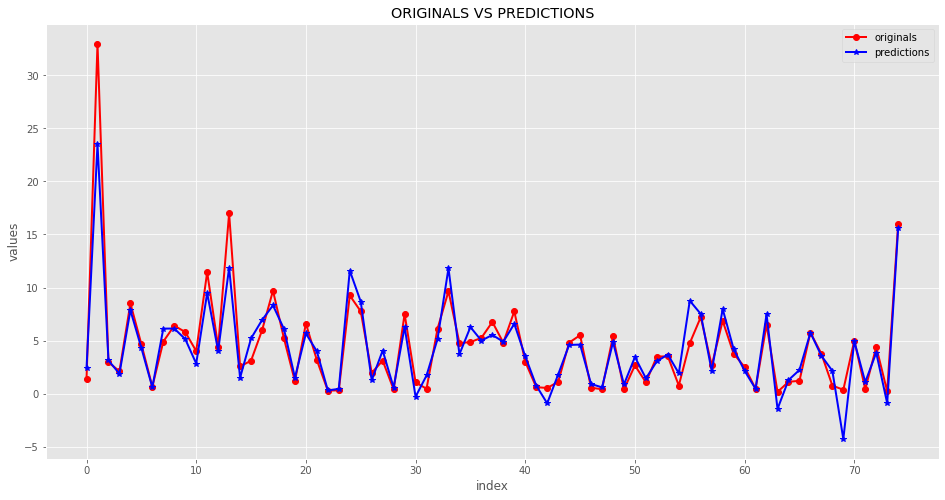

In [51]:
results(lg,X_train,X_test,y_train,y_test)

# Random Forest regressor

In [52]:
rfr = RandomForestRegressor()

RandomForestRegressor() 

r^2 value : 0.9018167850879972 

mean square error 2.2416093792000003 

mean absolute error 0.6267413333333338 

CV score: 1.2134219997434348 

########################################


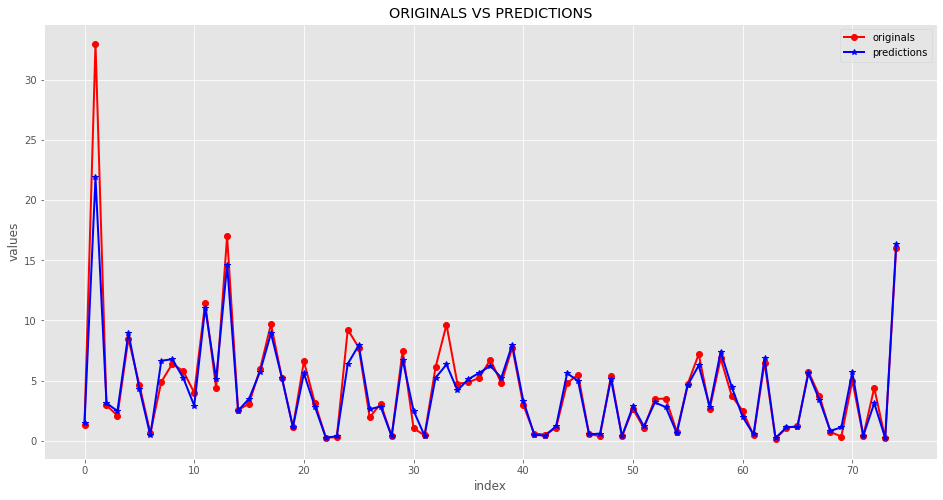

RandomForestRegressor()

In [53]:
results(rfr,X_train,X_test,y_train,y_test)
RandomForestRegressor() 

# Decision Tree Regressor

In [54]:
dtr =DecisionTreeRegressor()

DecisionTreeRegressor() 

r^2 value : 0.8649971843517146 

mean square error 3.0822333333333334 

mean absolute error 0.9249333333333332 

CV score: 1.9348614747474748 

########################################


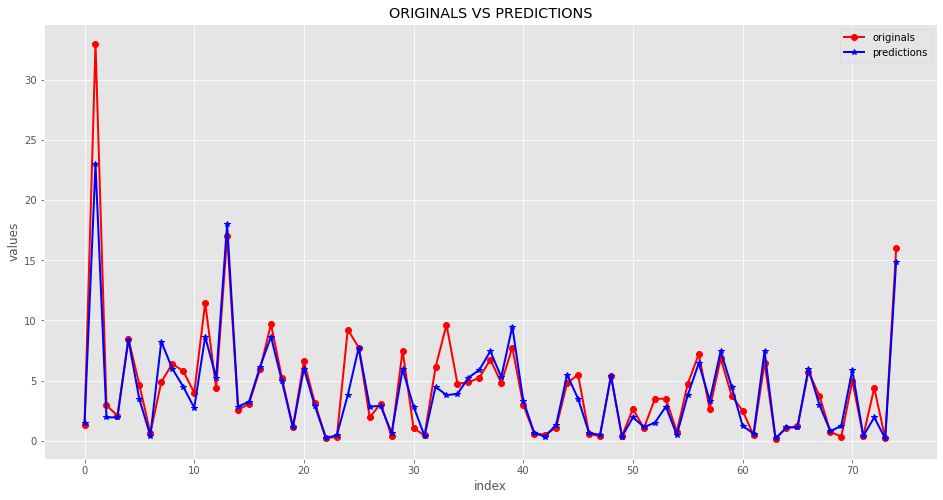

In [55]:
results(dtr,X_train,X_test,y_train,y_test)


# Hyper Tuned Ridge

In [56]:
params = {"alpha": [.01, .1, .5, .7, 1, 1.5, 2, 2.5, 3, 5, 8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,30]}
ridreg = Ridge()
clf = GridSearchCV(estimator=ridreg, param_grid=params, cv=5, return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 0.7, 1, 1.5, 2, 2.5, 3, 5, 8,
                                   9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
                                   21, 22, 23, 24, 25, 26, 27, 30]},
             return_train_score=True)

In [57]:
clf.best_params_

{'alpha': 23}

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 0.7, 1, 1.5, 2, 2.5, 3, 5, 8,
                                   9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
                                   21, 22, 23, 24, 25, 26, 27, 30]},
             return_train_score=True) 

r^2 value : 0.8807159455442723 

mean square error 2.723360153735145 

mean absolute error 0.9755908201128485 

CV score: 3.013142108089992 

########################################


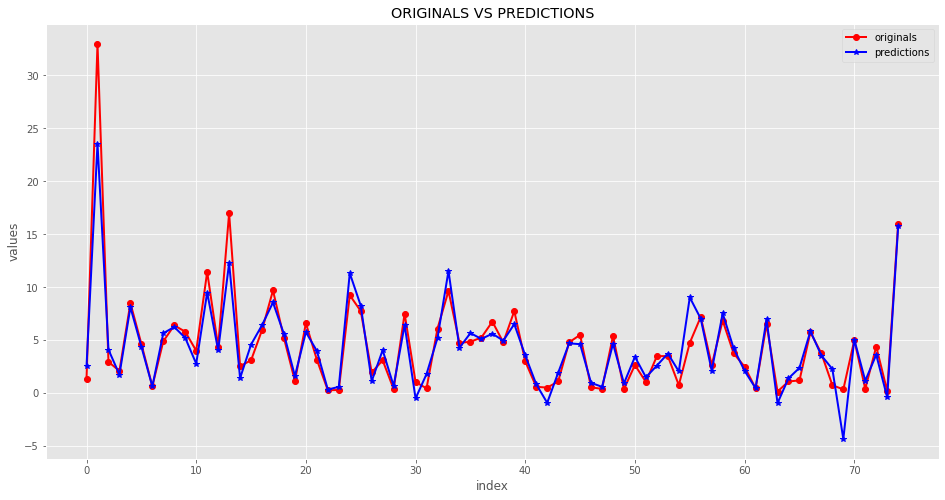

In [58]:
results(clf,X_train,X_test,y_train,y_test)

# Hyper Tuned Lasso

In [59]:
params = {"alpha": [.00001, .0001, .001, .005, .01, .1, 1, 5]}
lasreg = Lasso()
clf = GridSearchCV(estimator=lasreg, param_grid=params, cv=5, return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.005, 0.01, 0.1, 1,
                                   5]},
             return_train_score=True)

In [60]:
clf.best_params_

{'alpha': 0.1}

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.005, 0.01, 0.1, 1,
                                   5]},
             return_train_score=True) 

r^2 value : 0.8824197682430146 

mean square error 2.684460379008708 

mean absolute error 0.9823700461611429 

CV score: 2.919855877770298 

########################################


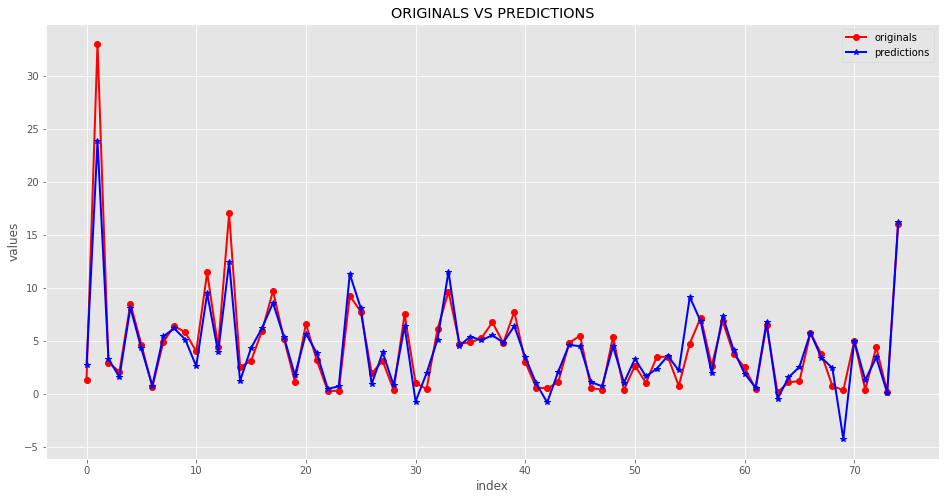

In [61]:
results(clf,X_train,X_test,y_train,y_test)

# Comparing all the results

In [62]:
Results = pd.DataFrame({
    'model':['linear','random Forest','Dicision Tree','Ridge','Lasso'],
    'r^2':r2,
    'cv_score':cv_score,
    'mae':mae,
    'mse':mse
})

In [63]:
Results

,model,r^2,cv_score,mae,mse
0,linear,0.873934,3.747733,1.023575,2.878199
1,random Forest,0.901817,2.874695,0.626741,2.241609
2,Dicision Tree,0.864997,3.738119,0.924933,3.082233
3,Ridge,0.880716,3.610160,0.975591,2.723360
4,Lasso,0.882420,3.957253,0.982370,2.684460
